In [1]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

In [2]:
filename = 'data.xlsx'

In [3]:
#df1 = pd.read_excel(filename, sheet_name = 'Forecasted Consumption')

In [4]:
df_dummy = pd.ExcelFile(filename)
sheet1 = df_dummy.parse(0)
sheet2 = df_dummy.parse(1)
sheet3 = df_dummy.parse(2)

In [5]:
print(sheet1.dtypes)
print("------")
print(sheet2.dtypes)
print("------")
print(sheet3.dtypes)

Date        datetime64[ns]
Meter ID             int64
kWh                float64
dtype: object
------
Meter ID                  int64
Exit Zone                object
Annual Quantity (kWh)     int64
dtype: object
------
Date                     datetime64[ns]
Exit Zone                        object
Annual Quantity (Min)             int64
Annual Quantity (Max)           float64
Rate (p/kWh)                    float64
dtype: object


In [6]:
sheet1.info()
print()
print("---------------------")
print()
sheet2.info()
print()
print("---------------------")
print()
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2190 non-null   datetime64[ns]
 1   Meter ID  2190 non-null   int64         
 2   kWh       2190 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 51.5 KB

---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Meter ID               3 non-null      int64 
 1   Exit Zone              3 non-null      object
 2   Annual Quantity (kWh)  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes

---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 5 columns):
 #   Column                 No

In [7]:
sheet3

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.028700
1,2020-04-01,EA2,0,73200.0,0.028700
2,2020-04-01,EA3,0,73200.0,0.028700
3,2020-04-01,EA4,0,73200.0,0.028700
4,2020-04-01,EM1,0,73200.0,0.028700
...,...,...,...,...,...
1021,2024-04-01,WA1,732000,NaN,0.384755
1022,2024-04-01,WA2,732000,NaN,0.384755
1023,2024-04-01,WM1,732000,NaN,0.445482
1024,2024-04-01,WM2,732000,NaN,0.445482


In [8]:
for i in range (len(sheet2['Meter ID'])):
    print (sheet1[sheet1['Meter ID'] == sheet2['Meter ID'][i]])

           Date    Meter ID        kWh
0    2020-10-01  1000000603  28.782474
3    2020-10-02  1000000603  26.690797
6    2020-10-03  1000000603  21.511312
9    2020-10-04  1000000603  22.801972
12   2020-10-05  1000000603  30.805517
...         ...         ...        ...
2175 2022-09-26  1000000603  18.553369
2178 2022-09-27  1000000603  18.801933
2181 2022-09-28  1000000603  19.015036
2184 2022-09-29  1000000603  19.263599
2187 2022-09-30  1000000603  17.927143

[730 rows x 3 columns]
           Date  Meter ID         kWh
1    2020-10-01  10588707  126.367711
4    2020-10-02  10588707  118.322449
7    2020-10-03  10588707   94.272125
10   2020-10-04  10588707   97.641038
13   2020-10-05  10588707  138.761245
...         ...       ...         ...
2176 2022-09-26  10588707   73.614794
2179 2022-09-27  10588707   75.116336
2182 2022-09-28  10588707   76.430689
2185 2022-09-29  10588707   77.744203
2188 2022-09-30  10588707   73.335098

[730 rows x 3 columns]
           Date  Meter ID   

In [9]:
newSheet3 = sheet3[(sheet3['Date'] >= '1-10-2020') & (sheet3['Date'] <= '30-09-2022')]

print(sheet3.info())
print()
print(newSheet3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1026 non-null   datetime64[ns]
 1   Exit Zone              1026 non-null   object        
 2   Annual Quantity (Min)  1026 non-null   int64         
 3   Annual Quantity (Max)  684 non-null    float64       
 4   Rate (p/kWh)           1026 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 40.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   570 non-null    datetime64[ns]
 1   Exit Zone              570 non-null    object        
 2   Annual Quantity (Min)  570 non-null    int64    

In [10]:
## find the metreID and exitZone mapping from sheet2
 
sheet2Reduced = sheet2.drop('Annual Quantity (kWh)', 1)
exitZones = sheet2Reduced['Exit Zone'].tolist()

In [11]:
ezone = sheet3['Exit Zone']

In [12]:
zoneToMeter = {}

for zone in exitZones:
    tempDf = sheet2Reduced[sheet2Reduced['Exit Zone'] == zone]
    mID = tempDf.iloc[0]['Meter ID']
    zoneToMeter[zone] = mID

for key in zoneToMeter.keys():
    print(key, zoneToMeter[key])

SC1 1000000603
EM2 10588707
NW1 10626610


In [13]:
sheet3 = newSheet3

In [14]:
newSheet3 = sheet3.loc[sheet3['Exit Zone'].isin(exitZones)]
newSheet3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 5 to 555
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   45 non-null     datetime64[ns]
 1   Exit Zone              45 non-null     object        
 2   Annual Quantity (Min)  45 non-null     int64         
 3   Annual Quantity (Max)  30 non-null     float64       
 4   Rate (p/kWh)           45 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.1+ KB


In [15]:
print(random.choice(ezone))

LS


In [16]:
#print(random.randint(0,1000))
print(random.uniform(0,100000))
print(random.random())

91326.36065278183
0.2770949504051441


In [17]:
newSheet3 = newSheet3[newSheet3['Date'] != '2020-04-01']

In [18]:
newSheet3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 119 to 555
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   36 non-null     datetime64[ns]
 1   Exit Zone              36 non-null     object        
 2   Annual Quantity (Min)  36 non-null     int64         
 3   Annual Quantity (Max)  24 non-null     float64       
 4   Rate (p/kWh)           36 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [19]:
sheet3 = newSheet3

In [20]:
def relevant_dates(sheet3):
    rateDates = sheet3['Date'].unique()
    sortedRateDates = sorted(rateDates)

    return sortedRateDates


In [21]:
sortedRateDates = relevant_dates(sheet3)
sortedRateDates

[numpy.datetime64('2020-10-01T00:00:00.000000000'),
 numpy.datetime64('2021-04-01T00:00:00.000000000'),
 numpy.datetime64('2021-10-01T00:00:00.000000000'),
 numpy.datetime64('2022-04-01T00:00:00.000000000')]

In [22]:
metreIDs = sheet2['Meter ID'].unique()
print(metreIDs, type(metreIDs))

[1000000603   10588707   10626610] <class 'numpy.ndarray'>


In [23]:
def Consumption (metreIDs, sheet1, sortedRateDates):
    consumptionData = []

    for metreID in metreIDs:
        sheet1Reduced = sheet1[sheet1['Meter ID'] == metreID]
        d = {}
        for idx, date in enumerate(sortedRateDates):
            if(idx != len(sortedRateDates)-1):
                nxtDate = sortedRateDates[idx+1]
                tempDf = sheet1Reduced[sheet1Reduced['Date'] >= date]
                tempDf = tempDf[tempDf['Date'] < nxtDate]
                val = tempDf['kWh'].sum()
                d[date] = [metreID , val]
            else:
                tempDf = sheet1Reduced[sheet1Reduced['Date'] >= date]
                val = tempDf['kWh'].sum()
                d[date] = [metreID , val]
        consumptionData.append(d)
        
    return (consumptionData)

In [24]:
CD = Consumption(metreIDs, sheet1, sortedRateDates)

In [25]:
for data in CD:
    for key in data.keys():
        print(key , data[key])
    print('------------------------------')

2020-10-01T00:00:00.000000000 [1000000603, 8908.61620600899]
2021-04-01T00:00:00.000000000 [1000000603, 3428.383793990991]
2021-10-01T00:00:00.000000000 [1000000603, 8790.85792188759]
2022-04-01T00:00:00.000000000 [1000000603, 3546.1420782475916]
------------------------------
2020-10-01T00:00:00.000000000 [10588707, 46488.11297780813]
2021-04-01T00:00:00.000000000 [10588707, 14736.887021688537]
2021-10-01T00:00:00.000000000 [10588707, 45783.81639460087]
2022-04-01T00:00:00.000000000 [10588707, 15441.183605399012]
------------------------------
2020-10-01T00:00:00.000000000 [10626610, 105024.35742833954]
2021-04-01T00:00:00.000000000 [10626610, 46754.64257166028]
2021-10-01T00:00:00.000000000 [10626610, 103681.9437768501]
2022-04-01T00:00:00.000000000 [10626610, 48097.056224813074]
------------------------------


In [26]:
def Rate(sheet3, exitZones, sortedRateDates):
    rateData = []

    for zone in exitZones:
        rateDataDict = {}
        for date in sortedRateDates:
            tempDf = sheet3[sheet3['Date'] == date]
            tempDf = tempDf[tempDf['Exit Zone'] == zone]
            rates = tempDf['Rate (p/kWh)'].tolist()
            rateDataDict[date] = [zone , rates]
        rateData.append(rateDataDict)
    return (rateData)

In [27]:
for data in Rate(sheet3, exitZones, sortedRateDates):
    for key in data.keys():
        data[key][0] = zoneToMeter[data[key][0]]
        print(key, data[key])
    print("--------------------------")

2020-10-01T00:00:00.000000000 [1000000603, [0.0333, 0.0297, 0.2431]]
2021-04-01T00:00:00.000000000 [1000000603, [0.033312536189378, 0.0297111809256614, 0.243191517947081]]
2021-10-01T00:00:00.000000000 [1000000603, [0.033312536189378, 0.0297111809256614, 0.243191517947081]]
2022-04-01T00:00:00.000000000 [1000000603, [0.03470596778416, 0.0309539712669535, 0.253363987036916]]
--------------------------
2020-10-01T00:00:00.000000000 [10588707, [0.0287, 0.0228, 0.182]]
2021-04-01T00:00:00.000000000 [10588707, [0.0294050827624451, 0.0233601354349738, 0.186471256542335]]
2021-10-01T00:00:00.000000000 [10588707, [0.0294050827624451, 0.0233601354349738, 0.186471256542335]]
2022-04-01T00:00:00.000000000 [10588707, [0.0306609794113917, 0.0243578512397119, 0.194435479194191]]
--------------------------
2020-10-01T00:00:00.000000000 [10626610, [0.0339, 0.0285, 0.2474]]
2021-04-01T00:00:00.000000000 [10626610, [0.0345836043372242, 0.0290747116109407, 0.252388900089359]]
2021-10-01T00:00:00.00000000

# Task 1

In [28]:
def TDC(metreIDs, sheet1, sheet3, exitZones, sortedRateDates):
    '''
    metreIDs: list with the metreIDs of the customer of whom we wish to find the cost
    sheet1: dataframe which provides data related to forecasted consumption
    sheet3: dataframe which gives the rate information in different reading date at different exitZone
    exitZones: list of exitZones 
    sortedRateDates: dates on which reading date and rate mapping is provided
    '''
    
    costDict = {}
    consumeDict = {}

    rateData = Rate(sheet3, exitZones, sortedRateDates)

    for idx, data in enumerate(Consumption(metreIDs, sheet1, sortedRateDates)):
        for date in sortedRateDates:
            data[date][0] == rateData[idx][date][0]

            consumed = data[date][1]
            charges = None
            if(consumed >= 0 and consumed < 73200):
                charges = rateData[idx][date][1][0]
            elif(consumed >= 73200 and consumed < 732000):
                charges = rateData[idx][date][1][1]
            elif(consumed >= 732000):
                charges = rateData[idx][date][1][2] 

            charges = charges * consumed

            if(str(data[date][0]) in costDict.keys()):
                costDict[str(data[date][0])] += float("{:.2f}".format((0.1 * charges)))
                consumeDict[str(data[date][0])] += float("{:.2f}".format((consumed)))
            else:
                costDict[str(data[date][0])] = float("{:.2f}".format((0.1 * charges)))
                consumeDict[str(data[date][0])] = float("{:.2f}".format((consumed)))
                
    costDataFrame = pd.DataFrame(costDict.items(), columns=['Meter ID', 'Total Cost (£)'])
    consumptionDataFrame = pd.DataFrame(consumeDict.items(), columns=['Meter ID', 'Total Estimated Consumption(kWh)'])
    mergedDf = pd.merge(consumptionDataFrame, costDataFrame, on="Meter ID")

    return (mergedDf)


In [29]:
TDC(metreIDs, sheet1, sheet3, exitZones, sortedRateDates)

,Meter ID,Total Estimated Consumption(kWh),Total Cost (£)
0,1000000603,24674.0,82.68
1,10588707,122450.0,358.72
2,10626610,303558.0,935.71


# Task 2

In [30]:
def Random_meter(N=random.randint(0,100)):
    ez = []
    aq = []
    mid = []
    for i in range(N):
        EZ = random.choice(ezone)
        AQ = random.uniform(0,100000)
        ez.append(EZ)
        aq.append(AQ)
        mid.append(random.randint(0,10000))
        
    D_tuples = list(zip(mid, ez, aq))
    
    DF = pd.DataFrame(D_tuples, columns = ['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])
    
    return (DF)

In [31]:
Random_meter()

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,3995,WA1,31057.583220
1,57,LC,67429.426556
2,3050,NT3,83587.387058
3,3241,EM1,30962.143275
4,2072,WA2,71362.543028
...,...,...,...
88,5606,WM2,52846.453425
89,4630,EM4,79144.532645
90,9191,SO1,39870.463842
91,8684,WM1,94065.001469


In [32]:
my_date = '2020-10-31'

In [33]:
my_date = datetime.strptime(my_date, "%Y-%m-%d")
print (my_date)

2020-10-31 00:00:00


In [34]:
print ('Month', my_date.month)
print ('Year', my_date.year)

Month 10
Year 2020


In [35]:
t = np.arange(datetime(1985,7,1), datetime(2015,7,1), timedelta(days=1)).astype(datetime)


In [36]:
A= pd.date_range(start="2018-09-09",end="2020-02-02").to_pydatetime().tolist()


In [37]:
len(A)

512

In [38]:
sheet1['Date'] = pd.to_datetime(sheet1['Date'])
data = sheet1.set_index('Date')

In [39]:
data

,Meter ID,kWh
Date,,
2020-10-01,1000000603,28.782474
2020-10-01,10588707,126.367711
2020-10-01,10626610,326.240595
2020-10-02,1000000603,26.690797
2020-10-02,10588707,118.322449
...,...,...
2022-09-29,10588707,77.744203
2022-09-29,10626610,270.357196
2022-09-30,1000000603,17.927143


In [40]:
data[['kWh']]

,kWh
Date,
2020-10-01,28.782474
2020-10-01,126.367711
2020-10-01,326.240595
2020-10-02,26.690797
2020-10-02,118.322449
...,...
2022-09-29,77.744203
2022-09-29,270.357196
2022-09-30,17.927143


In [41]:
data_consumption = data[['kWh']]
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'kWh'].shift()
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()
data_consumption = data_consumption.dropna()

In [42]:
data_consumption

,kWh,Yesterday,Yesterday_Diff
Date,,,
2020-10-01,326.240595,126.367711,97.585236
2020-10-02,26.690797,326.240595,199.872884
2020-10-02,118.322449,26.690797,-299.549798
2020-10-02,316.860290,118.322449,91.631652
2020-10-03,21.511312,316.860290,198.537841
...,...,...,...
2022-09-29,77.744203,19.263599,-248.005488
2022-09-29,270.357196,77.744203,58.480604
2022-09-30,17.927143,270.357196,192.612993


In [43]:
X_train = data_consumption[:'2020'].drop(['kWh'], axis = 1)
y_train = data_consumption.loc[:'2020', 'kWh']
X_test = data_consumption['2022'].drop(['kWh'], axis = 1)
y_test = data_consumption.loc['2022', 'kWh']

In [44]:
X_test

,Yesterday,Yesterday_Diff
Date,,
2022-01-01,614.239586,324.646178
2022-01-01,46.929989,-567.309597
2022-01-01,239.867550,192.937561
2022-01-02,580.948407,341.080857
2022-01-02,47.061218,-533.887190
...,...,...
2022-09-29,19.263599,-248.005488
2022-09-29,77.744203,58.480604
2022-09-30,270.357196,192.612993


In [45]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 
from sklearn.ensemble import RandomForestRegressor

In [46]:
import matplotlib.pyplot as plt

LR: 0.345770 (0.187792)
LASSO: 0.345807 (0.187780)
RF: 0.538238 (0.495982)


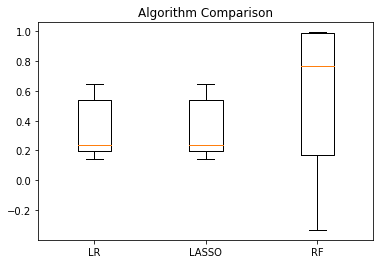

In [47]:
# Testing some time series Algorithms
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('LASSO', linear_model.Lasso()))
models.append(('RF', RandomForestRegressor()))


# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=12)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [48]:
y_true = y_test.values
RF = RandomForestRegressor()
pmodel = RF.fit(X_train, y_train)
y_pred = pmodel.predict(X_test)

In [49]:
len(y_pred)

819

In [50]:
K=[random.uniform(0,500) for i in range(10)]
print (K)

[164.77633797630187, 211.5054528548243, 449.0528290918708, 97.70330308061781, 455.55657456234206, 437.61476955559345, 62.156778551080485, 250.36044614711966, 227.84377407000844, 16.20745364657672]


In [51]:
A= pd.date_range(start="2018-09-09",end="2020-02-02").to_pydatetime().tolist()
    
kWh = [random.uniform(0,500) for i in range(len(A))]
    
mock_data = list(zip(A, kWh))
    
    
data_mock = pd.DataFrame(mock_data, columns = ['Date', 'kWh'])
    

# Task 3

In [52]:
def mock_consumption(mlist=[8900], start = '2020-10-31', end = '2022-10-31'):
    
    if start>end:
        return(print ('CAUTION: Your start date should not be in future than end date'))
        
    
    mock_meter_consumption_list = np.array(len(mlist))
    frames = []
    
    for k in range (len(mlist)):
        
        #Range of the date
        A = pd.date_range(start = start, end = end).to_pydatetime().tolist()
        
        #Random kWh charges of the same length as dates
        kWh = [random.uniform(0,500) for i in range(len(A))]
    
        mock_data = list(zip(A, kWh))
        
        #Our raw_test_data_set for prediction
        data_mock = pd.DataFrame(mock_data, columns = ['Date', 'kWh'])
    
        # creating new dataframe from consumption column
        data_mock_consumption = data_mock[['kWh']]

        # inserting new column with yesterday's consumption values
        data_mock_consumption.loc[:,'Yesterday'] = data_mock_consumption.loc[:,'kWh'].shift()

        # inserting another column with difference between yesterday and day before yesterday's consumption values.
        data_mock_consumption.loc[:,'Yesterday_Diff'] = data_mock_consumption.loc[:,'Yesterday'].diff()

        # dropping NAs and kWh
        data_mock_consumption = data_mock_consumption.dropna()
        data_mock_consumption = data_mock_consumption.drop(['kWh'], axis = 1)
    
        data_mock_pred_consumption = pmodel.predict(data_mock_consumption)
    
        meter_ID = [mlist[k] for i in range(len(A))]
        
        meter_data = list(zip(A, meter_ID, data_mock_pred_consumption))
    
        mock_meter_consumption_list = pd.DataFrame( meter_data, columns = ['Date', 'Meter ID', 'kWh'])
        
        frames.append(mock_meter_consumption_list)    
    
    mock_meter_consumption = pd.concat(frames)
    
    return (mock_meter_consumption)
            
    

In [53]:
mock_consumption(mlist =[10626610, 10588707, 1000000603])

,Date,Meter ID,kWh
0,2020-10-31,10626610,399.779638
1,2020-11-01,10626610,374.338190
2,2020-11-02,10626610,284.346300
3,2020-11-03,10626610,495.565419
4,2020-11-04,10626610,329.891832
...,...,...,...
724,2022-10-25,1000000603,105.798167
725,2022-10-26,1000000603,33.965692
726,2022-10-27,1000000603,162.015477
727,2022-10-28,1000000603,297.284003


In [54]:
mock_consumption(start = '2023-01-01') # Test for Date

CAUTION: Your start date should not be in future than end date


# Task 4

## Assumptions:
 ## 1. meter is a list
 ## 2. Consumption table 

In [55]:
def Random_meter_datagen_benchmark(metreIDs, N=random.randint(0,100)):
    ez = []
    aq = []
    mid = []
    idx = 0
    for i in range(N):
        EZ = random.choice(ezone)
        AQ = random.uniform(0,100000)
        ez.append(EZ)
        aq.append(AQ)
        mid.append(metreIDs[idx])
        idx += 1
        idx = idx % 3
        
    D_tuples = list(zip(mid, ez, aq))
    
    DF = pd.DataFrame(D_tuples, columns = ['Meter ID', 'Exit Zone', 'Annual Quantity (kWh)'])
    
    return (DF)

In [56]:
mlist = Random_meter_datagen_benchmark(metreIDs)['Meter ID']
mlist

0     1000000603
1       10588707
2       10626610
3     1000000603
4       10588707
5       10626610
6     1000000603
7       10588707
8       10626610
9     1000000603
10      10588707
11      10626610
12    1000000603
13      10588707
14      10626610
15    1000000603
16      10588707
17      10626610
18    1000000603
19      10588707
20      10626610
21    1000000603
22      10588707
23      10626610
24    1000000603
25      10588707
26      10626610
27    1000000603
28      10588707
29      10626610
30    1000000603
31      10588707
Name: Meter ID, dtype: int64

In [57]:
benchmark_data = mock_consumption(metreIDs, start = '2020-10-31', end = '2022-09-30')

In [58]:
benchmark_data['Meter ID'].value_counts()

10588707      698
10626610      698
1000000603    698
Name: Meter ID, dtype: int64

In [59]:
benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 697
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2094 non-null   datetime64[ns]
 1   Meter ID  2094 non-null   int64         
 2   kWh       2094 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 65.4 KB


In [60]:
benchmark_data

,Date,Meter ID,kWh
0,2020-10-31,1000000603,396.492734
1,2020-11-01,1000000603,31.419092
2,2020-11-02,1000000603,36.160565
3,2020-11-03,1000000603,310.394855
4,2020-11-04,1000000603,443.680060
...,...,...,...
693,2022-09-24,10626610,398.808828
694,2022-09-25,10626610,35.648421
695,2022-09-26,10626610,152.312242
696,2022-09-27,10626610,42.633156


In [61]:
sheet3 = df_dummy.parse(2)
newSheet3 = sheet3[(sheet3['Date'] >= '2020-10-31') & (sheet3['Date'] <= '2022-09-30')]

In [62]:
newSheet3 = newSheet3.loc[sheet3['Exit Zone'].isin(exitZones)]


In [63]:
newSheet3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 233 to 555
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   27 non-null     datetime64[ns]
 1   Exit Zone              27 non-null     object        
 2   Annual Quantity (Min)  27 non-null     int64         
 3   Annual Quantity (Max)  18 non-null     float64       
 4   Rate (p/kWh)           27 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [64]:
sortedRateDates = relevant_dates(newSheet3)
sortedRateDates

[numpy.datetime64('2021-04-01T00:00:00.000000000'),
 numpy.datetime64('2021-10-01T00:00:00.000000000'),
 numpy.datetime64('2022-04-01T00:00:00.000000000')]

In [65]:
TDC(metreIDs, benchmark_data, newSheet3, exitZones, sortedRateDates)

,Meter ID,Total Estimated Consumption(kWh),Total Cost (£)
0,1000000603,112238.35,379.36
1,10588707,114672.14,342.05
2,10626610,119628.01,419.54


## Complexity analysis of the approach

> Task : Compute and return a dataframe describing Transportation cost

Let 

* $z$ denote number of unique zones
* $c$ denote number of rows in the forecasted consumption table
* $r$ denote number of unique reading dates

then time required is -----


For calculating 
* sortedRateDates : $O(r * logr)$ 

The functions
* Consumption() takes $O(z (c + rc))$ which is equivalent to $O(zrc)$

* Rate() takes $O(zr)$
* TDC() takes $O(zr + zr^2c)$  i.e. $O(zr^2c)$


## Task 5

The dominant term in my approach is the $r^2$ in the $O(zr^2c)$. That comes up as in this approach I take, $O(zr^2c)$ as $O(zrc) * O(r)$ where the $O(r)$ comes from the iteration over `sortedRateDates`. Now, in the output of `Consumption()` we already have the date related information. 

To improve the complexity, we should try and exlpore the means on how we can use that information.

